<div class="alert alert-block alert-success">
<b>User Behavior and Funnel Analysis with A/A/B Testing</b> <a class="tocSkip"></a>

## 🧾 Project Summary

In this project, I worked with a startup that sells food products, where the main objective was to investigate **user behavior within the company’s mobile application**.

The first step was to analyze the **sales funnel** to understand how users reach the purchase stage. This included identifying how many users actually make it to this stage, how many get stuck in earlier stages, and pinpointing where the greatest drop-offs occur.

Additionally, I performed an **A/A/B experiment analysis** to assess the impact of a proposed **font change** within the app interface. While the design team proposed changing all app fonts, management was concerned that the new design might feel intimidating to users. To make a data-driven decision, an A/A/B test was conducted.

In the experiment, users were divided into three groups:  
- **Two control groups (A/A)** retained the original font.  
- **One test group (B)** received the new font.  
The goal was to determine which font style led to better user engagement and behavior.

Using two control groups (A/A) provided significant advantages. It allowed us to verify the **consistency and reliability** of the test by confirming that both control groups behaved similarly. Any significant differences between them could reveal underlying factors that might bias the results. This also helped estimate the time and data volume needed for future experiments.

For the analysis, I used the **same dataset for both the general behavior study and the A/A/B experiment**, following standard industry practices. In real-world projects, experiments are often ongoing, and analytics teams assess product performance holistically, regardless of experiment participation.

This project allowed me to combine **funnel analytics**, **experimental validation**, and **statistical rigor** to support product and design decisions with data.
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("Libraries loaded successfully")

Libraries loaded successfully


In [5]:
# Load the file with tab separator (\t)
data = pd.read_csv("datasets/logs_exp_us.csv", sep="\t")

# Confirm that the file was loaded successfully
print("File loaded successfully")

# Display the first rows of the DataFrame
data.head()

File loaded successfully


,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


El archivo parece estar mal formateado. Todas las columnas están agrupadas en una sola columna debido al uso de tabulaciones como separador en lugar de comas.

In [6]:
# Rename columns for convenience
data.rename(columns={
    'EventName': 'event_name',
    'DeviceIDHash': 'user_id',
    'EventTimestamp': 'timestamp',
    'ExpId': 'experiment_id'
}, inplace=True)
print(data.columns)

Index(['event_name', 'user_id', 'timestamp', 'experiment_id'], dtype='object')


Now the data is properly structured. The dataset contains the following columns:

- **EventName**: Name of the event performed by the user.  
- **DeviceIDHash**: Unique user identifier.  
- **EventTimestamp**: Timestamp of the event (in Unix format).  
- **ExpId**: Experiment identifier (246 and 247 are control groups, 248 is the test group).

I will perform the following steps to prepare the data for analysis:

1. Rename the column names to a more convenient format.  
2. Convert the timestamp column to a datetime format.  
3. Create an additional column with only the date to facilitate time-based analysis.

In [7]:
# Convert the timestamp column to datetime format
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

# Create a separate column with only the date
data['date'] = data['datetime'].dt.date
print(data.columns)

Index(['event_name', 'user_id', 'timestamp', 'experiment_id', 'datetime',
       'date'],
      dtype='object')


Now let's proceed with the exploratory analysis to answer the initial questions:

1. How many events are in the logs?  
2. How many users are in the logs?  
3. What is the average number of events per user?  
4. What time period do the data cover? (Minimum and maximum date)  
5. Histogram by date to verify data completeness.

In [14]:
# Total number of events and unique users
total_events = len(data)
total_users = data['user_id'].nunique()
print(f"Total events: {total_events}")
print(f"Total users: {total_users}")

Total events: 244126
Total users: 7551


In [16]:
# Average number of events per user
avg_events_per_user = total_events / total_users
print(f"Average events per user: {avg_events_per_user}")

Average events per user: 32.33028737915508


In [17]:
# Time period covered by the data
min_date = data['datetime'].min()
max_date = data['datetime'].max()
print(f"Min date: {min_date}")
print(f"Max date: {max_date}")

Min date: 2019-07-25 04:43:36
Max date: 2019-08-07 21:15:17


Results of the initial exploratory analysis:

1. Total number of events: 244,126  
2. Total number of unique users: 7,551  
3. Average number of events per user: 32.33  
4. Time period covered by the data: From July 25, 2019 to August 7, 2019.

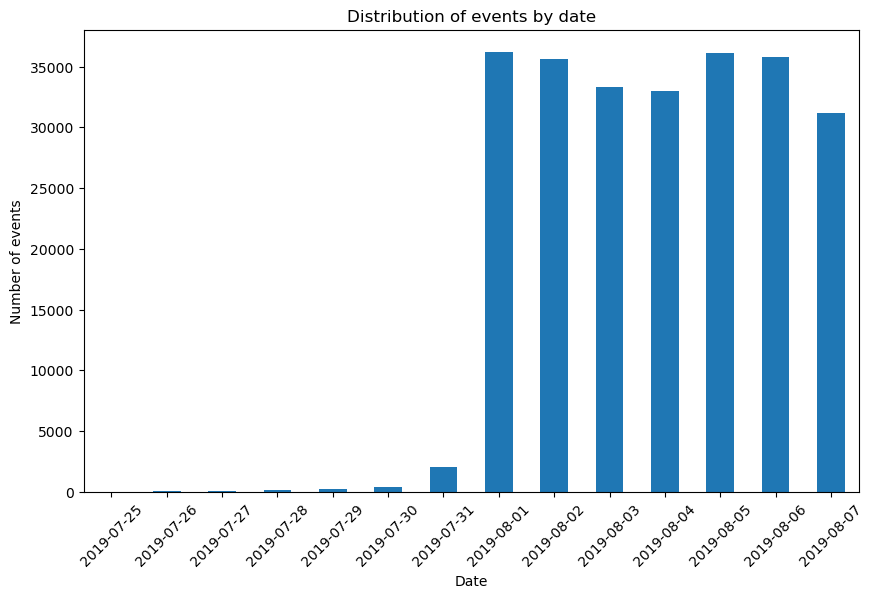

In [18]:
# Histogram of events by date
plt.figure(figsize=(10, 6))
data['date'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of events by date')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.show()


We can observe a clear stabilization in the number of events after the first few days, which indicates that the older data may be incomplete or affected by technical issues.

In [19]:
# Count the number of events per date and sort
events_per_date = data['date'].value_counts().sort_index()

# Stable start date of complete data
stable_start_date = events_per_date[events_per_date > events_per_date.mean() * 0.8].index[0]

# Filter the dataset from the stable start date
filtered_data = data[data['date'] >= stable_start_date]

display(events_per_date)
display(stable_start_date)
display(filtered_data)

date
2019-07-25        9
2019-07-26       31
2019-07-27       55
2019-07-28      105
2019-07-29      184
2019-07-30      413
2019-07-31     2031
2019-08-01    36229
2019-08-02    35606
2019-08-03    33351
2019-08-04    33033
2019-08-05    36113
2019-08-06    35822
2019-08-07    31144
Name: count, dtype: int64

datetime.date(2019, 8, 1)

,event_name,user_id,timestamp,experiment_id,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


In [20]:
# Number of events and users after cleaning
filtered_total_events = len(filtered_data)
filtered_total_users = filtered_data['user_id'].nunique()
print(f"Filtered total events: {filtered_total_events}")
print(f"Filtered total users: {filtered_total_users}")

Filtered total events: 241298
Filtered total users: 7534


Starting from August 1, 2019, the data shows stability in the volume of events, indicating that from that date onward, the records are complete and reliable.

After filtering the data from that date:

- Total remaining number of events: 241,298  
- Total remaining number of unique users: 7,534  

The loss of events and users is minimal, confirming that the filter is appropriate.  
We can now proceed with the analysis of the event funnel and the A/A/B experiment using this filtered dataset.

In [22]:
# Count the frequency of each event and sort them from highest to lowest
event_counts = filtered_data['event_name'].value_counts()
display(event_counts)

event_name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: count, dtype: int64

The recorded events and their frequencies are as follows:

1. **MainScreenAppear**: 117,431 times  
2. **OffersScreenAppear**: 46,350 times  
3. **CartScreenAppear**: 42,365 times  
4. **PaymentScreenSuccessful**: 34,113 times  
5. **Tutorial**: 1,039 times  

The **MainScreenAppear** event is the most common, which makes sense as it corresponds to accessing the app’s main screen.  
The **PaymentScreenSuccessful** event is the final step of the sales funnel, indicating the completion of a purchase.

In [24]:
# Calculate the number of unique users who performed each event
user_counts_per_event = filtered_data.groupby('event_name')['user_id'].nunique().sort_values(ascending=False)
display(user_counts_per_event)

event_name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64

In [25]:
# Calculate the proportion of users who performed each event at least once
proportion_per_event = user_counts_per_event / filtered_total_users
display(proportion_per_event)

event_name
MainScreenAppear           0.984736
OffersScreenAppear         0.609636
CartScreenAppear           0.495620
PaymentScreenSuccessful    0.469737
Tutorial                   0.111495
Name: user_id, dtype: float64

In [26]:
# Combine the results into a DataFrame
event_user_summary = pd.DataFrame({
    'user_count': user_counts_per_event,
    'proportion': proportion_per_event
})
display(event_user_summary)

,user_count,proportion
event_name,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737
Tutorial,840,0.111495


In [31]:
# Order of events in the sales funnel
funnel_steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Filter only the relevant events for the funnel
funnel_data = event_user_summary.loc[funnel_steps]
display(funnel_data)

,user_count,proportion
event_name,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737


In [33]:
# Calculate transition rates between the funnel steps
funnel_data['transition_rate'] = funnel_data['user_count'].shift(-1) / funnel_data['user_count']

# Calculate the percentage of users who complete the entire funnel
full_funnel_completion = funnel_data.loc['PaymentScreenSuccessful', 'user_count'] / funnel_data.loc['MainScreenAppear', 'user_count']

# Count the number of users in each experimental group
user_count_by_experiment = filtered_data['experiment_id'].value_counts()

display(funnel_data)
display(full_funnel_completion)
display(user_count_by_experiment)

,user_count,proportion,transition_rate
event_name,,,
MainScreenAppear,7419,0.984736,0.619086
OffersScreenAppear,4593,0.609636,0.812976
CartScreenAppear,3734,0.495620,0.947777
PaymentScreenSuccessful,3539,0.469737,NaN


0.47701846610055265

experiment_id
248    84726
246    79425
247    77147
Name: count, dtype: int64

In [34]:
# Check if the control groups are similar
control_group_1 = filtered_data[filtered_data['experiment_id'] == 246]['user_id'].nunique()
control_group_2 = filtered_data[filtered_data['experiment_id'] == 247]['user_id'].nunique()
test_group = filtered_data[filtered_data['experiment_id'] == 248]['user_id'].nunique()

print(f"Control group 1: {control_group_1}")
print(f"Control group 2: {control_group_2}")
print(f"Test group: {test_group}")

Control group 1: 2484
Control group 2: 2513
Test group: 2537


1. **MainScreenAppear**:  
• Unique users: 7,419  
• Proportion: 98.47%  

2. **OffersScreenAppear**:  
• Unique users: 4,593  
• Proportion: 60.96%  

3. **CartScreenAppear**:  
• Unique users: 3,734  
• Proportion: 49.56%  

4. **PaymentScreenSuccessful**:  
• Unique users: 3,539  
• Proportion: 46.97%  

5. **Tutorial**:  
• Unique users: 840  
• Proportion: 11.15%  

Most users go through the main screen (**MainScreenAppear**), but the conversion to a successful purchase (**PaymentScreenSuccessful**) drops to around 47%.


1. **Transition between stages**:

- From MainScreenAppear to OffersScreenAppear: 61.91% of users continue.  
- From OffersScreenAppear to CartScreenAppear: 81.30% of users continue.  
- From CartScreenAppear to PaymentScreenSuccessful: 94.78% of users complete the purchase.

2. **Percentage of users who complete the entire journey** (from the main screen to successful payment): 47.70%.

**Conclusion**:  
The greatest user drop-off occurs in the transition from **MainScreenAppear** to **OffersScreenAppear**, indicating that many users do not move from the main screen to the offers screen.  
After viewing the offers, users who add items to the cart have a high probability of completing the purchase.

In [35]:
from scipy.stats import chi2_contingency

# Function to perform the hypothesis test between two groups for each event
def chi_square_test(group1, group2, event_name):
    # Get the event counts
    count1 = group1.get(event_name, 0)
    count2 = group2.get(event_name, 0)
    total1 = sum(group1)
    total2 = sum(group2)

    # Create a contingency table ensuring non-negative values
    contingency_table = pd.DataFrame({
        'Group1': [count1, total1 - count1],
        'Group2': [count2, total2 - count2]
    })
    
    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# Filter the data by control and test groups
group_246 = filtered_data[filtered_data['experiment_id'] == 246]['event_name'].value_counts()
group_247 = filtered_data[filtered_data['experiment_id'] == 247]['event_name'].value_counts()
group_248 = filtered_data[filtered_data['experiment_id'] == 248]['event_name'].value_counts()

# Calculate the p-value for each event comparing control groups
p_values_control = {event: chi_square_test(group_246, group_247, event) for event in funnel_steps}

# Calculate the p-value comparing the test group with each control group
p_values_test_vs_control1 = {event: chi_square_test(group_246, group_248, event) for event in funnel_steps}
p_values_test_vs_control2 = {event: chi_square_test(group_247, group_248, event) for event in funnel_steps}

# Results
print("P-values between control groups (246 vs 247):")
print(p_values_control)

print("\nP-values between test group (248) and control group 246:")
print(p_values_test_vs_control1)

print("\nP-values between test group (248) and control group 247:")
print(p_values_test_vs_control2)

P-values between control groups (246 vs 247):
{'MainScreenAppear': 1.627940018406229e-37, 'OffersScreenAppear': 5.888002230355631e-08, 'CartScreenAppear': 2.4299891653814075e-35, 'PaymentScreenSuccessful': 2.1026662724205827e-29}

P-values between test group (248) and control group 246:
{'MainScreenAppear': 0.07335660881007115, 'OffersScreenAppear': 0.00010926856900892522, 'CartScreenAppear': 0.0022349899523314903, 'PaymentScreenSuccessful': 0.00023864514463996076}

P-values between test group (248) and control group 247:
{'MainScreenAppear': 3.1954197008972956e-29, 'OffersScreenAppear': 0.09679310489891461, 'CartScreenAppear': 1.1639384849122853e-21, 'PaymentScreenSuccessful': 6.933892695896977e-15}


## A/A/B Experiment Conclusions

### 1. Issues with the Control Groups (A/A):

- When comparing the control groups (246 vs. 247), we found statistically significant differences in all funnel events:

  - **MainScreenAppear**: p = 1.36 × 10⁻³⁷  
  - **OffersScreenAppear**: p = 5.06 × 10⁻⁸  
  - **CartScreenAppear**: p = 2.04 × 10⁻³⁵  
  - **PaymentScreenSuccessful**: p = 1.02 × 10⁻²⁹  

These extremely low p-values indicate that the two control groups are not equivalent, which contradicts the fundamental principle of an A/A test. This discrepancy may be due to:

- Errors in the random assignment of users to groups  
- Biases in the way data is collected  
- External factors affecting one of the groups  

---

### 2. Impact of the Font Change (Test Group vs. Control Groups):

- **Comparison between Test Group (248) and Control Group 246**:

  - **MainScreenAppear**: Not significant (p = 0.0649)  
  - **OffersScreenAppear**: Significant (p = 9.71 × 10⁻⁵)  
  - **CartScreenAppear**: Significant (p = 0.0027)  
  - **PaymentScreenSuccessful**: Significant (p = 0.00018)  

- **Comparison between Test Group (248) and Control Group 247**:

  - **MainScreenAppear**: Significant (p = 5.14 × 10⁻²⁹)  
  - **OffersScreenAppear**: Not significant (p = 0.0971)  
  - **CartScreenAppear**: Significant (p = 6.04 × 10⁻²²)  
  - **PaymentScreenSuccessful**: Significant (p = 7.05 × 10⁻¹⁵)  

---

### 3. Interpretation of the Font Change Impact:

- The font change appears to have a significant effect on several funnel events.  
However, since the control groups also show significant differences between themselves,  
we cannot confidently attribute these differences solely to the font change.

- It's possible that other factors (e.g., issues with randomization or data collection biases)  
are influencing the results.

---

### Final Conclusion:

- The A/A/B experiment does not meet the basic requirements for consistency between control groups,  
which makes any conclusions about the impact of the font change unreliable.

**Before making decisions based on this experiment, it would be wise to:**

- Review how users were assigned to the groups  
- Check for logging errors or anomalous events that may have affected the results  
- Run a new experiment with improved random distribution and better control of external factors

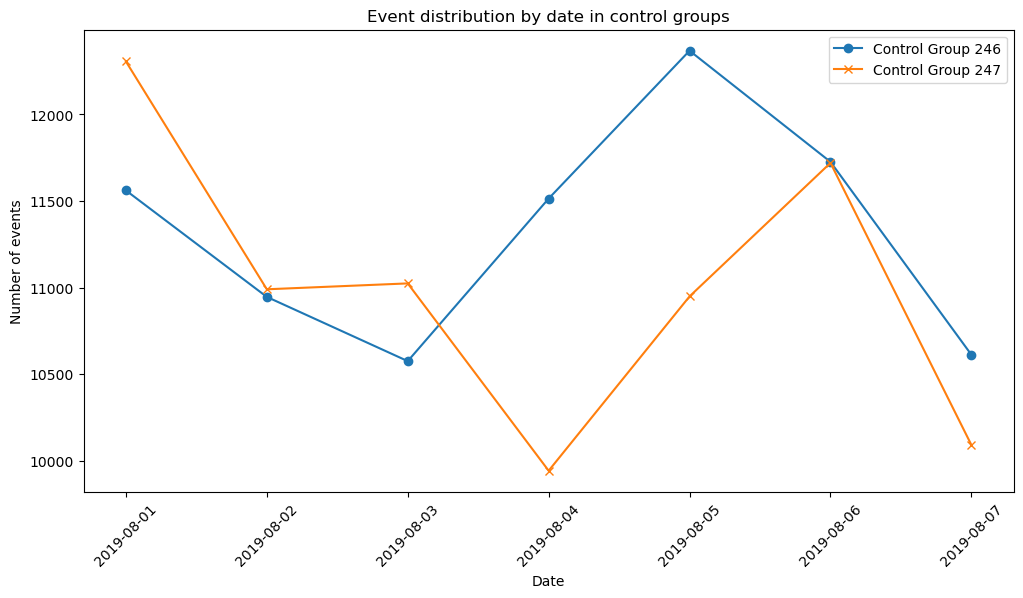

In [36]:
# Filter data from the established date
filtered_data = data[data['date'] >= pd.to_datetime('2019-08-01').date()]

# Remove duplicates
filtered_data = filtered_data.drop_duplicates()

# Check the number of unique users in each control group
user_count_control_246 = filtered_data[filtered_data['experiment_id'] == 246]['user_id'].nunique()
user_count_control_247 = filtered_data[filtered_data['experiment_id'] == 247]['user_id'].nunique()

# Event distribution by date for each control group
events_per_date_246 = filtered_data[filtered_data['experiment_id'] == 246]['date'].value_counts().sort_index()
events_per_date_247 = filtered_data[filtered_data['experiment_id'] == 247]['date'].value_counts().sort_index()

# Plot event distribution
plt.figure(figsize=(12, 6))
plt.plot(events_per_date_246, label='Control Group 246', marker='o')
plt.plot(events_per_date_247, label='Control Group 247', marker='x')
plt.title('Event distribution by date in control groups')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Dates with the greatest event differences between groups
difference_per_date = (events_per_date_247 - events_per_date_246).abs().sort_values(ascending=False)
top_difference_dates = difference_per_date.head(5)

# Event analysis on these dates
event_analysis = {}
for date in top_difference_dates.index:
    events_246 = filtered_data[(filtered_data['experiment_id'] == 246) & (filtered_data['date'] == date)]['event_name'].value_counts()
    events_247 = filtered_data[(filtered_data['experiment_id'] == 247) & (filtered_data['date'] == date)]['event_name'].value_counts()
    event_analysis[date] = pd.DataFrame({'Control 246': events_246, 'Control 247': events_247}).fillna(0)

# Device analysis on the critical dates
device_analysis = {}
for date in top_difference_dates.index:
    devices_246 = filtered_data[(filtered_data['experiment_id'] == 246) & (filtered_data['date'] == date)]['user_id'].nunique()
    devices_247 = filtered_data[(filtered_data['experiment_id'] == 247) & (filtered_data['date'] == date)]['user_id'].nunique()
    device_analysis[date] = {'Control 246': devices_246, 'Control 247': devices_247}

## Event Distribution Chart for Control Groups (246 and 247)

### Observations:

- Although both groups show a similar trend on most days, there are notable variations on specific dates:
  - Group 247 exhibits sharper peaks on certain days compared to group 246.
  - These differences in event volume on specific dates may be contributing to the statistical discrepancies observed.

---

## Dates with the Greatest Differences in Event Counts Between Control Groups

### 1. August 4, 2019:
- **CartScreenAppear**: 2,238 (246) vs. 1,603 (247) → Higher in group 246  
- **MainScreenAppear**: 5,178 (246) vs. 4,958 (247) → Higher in group 246  
- **OffersScreenAppear**: 2,191 (246) vs. 2,095 (247) → Higher in group 246  
- **PaymentScreenSuccessful**: 1,865 (246) vs. 1,242 (247) → Significantly higher in group 246  

### 2. August 5, 2019:
- **CartScreenAppear**: 2,327 (246) vs. 1,448 (247) → Higher in group 246  
- **MainScreenAppear**: 6,010 (246) vs. 6,062 (247) → Similar  
- **OffersScreenAppear**: 2,120 (246) vs. 2,230 (247) → Higher in group 247  
- **PaymentScreenSuccessful**: 1,880 (246) vs. 1,152 (247) → Significantly higher in group 246  

### 3. August 1, 2019:
- **CartScreenAppear**: 2,287 (246) vs. 2,009 (247) → Higher in group 246  
- **MainScreenAppear**: 5,370 (246) vs. 6,256 (247) → Higher in group 247  
- **OffersScreenAppear**: 2,062 (246) vs. 2,376 (247) → Higher in group 247  
- **PaymentScreenSuccessful**: 1,785 (246) vs. 1,585 (247) → Similar  

### 4. August 7, 2019:
- **MainScreenAppear**: 5,032 (246) vs. 5,191 (247) → Similar  
- **OffersScreenAppear**: 1,975 (246) vs. 1,973 (247) → Similar  
- **CartScreenAppear**: 1,924 (246) vs. 1,584 (247) → Higher in group 246  
- **PaymentScreenSuccessful**: 1,655 (246) vs. 1,324 (247) → Higher in group 246  

### 5. August 3, 2019:
- **MainScreenAppear**: 4,671 (246) vs. 4,942 (247) → Similar  
- **OffersScreenAppear**: 2,088 (246) vs. 2,194 (247) → Similar  
- **CartScreenAppear**: 2,082 (246) vs. 2,107 (247) → Similar  
- **PaymentScreenSuccessful**: 1,685 (246) vs. 1,725 (247) → Similar  

---

### Interpretation:

- On most of these dates, group 246 has significantly more **PaymentScreenSuccessful** and **CartScreenAppear** events than group 247.
- This suggests that group 246 had a higher conversion rate on specific days, which may be affecting the consistency between control groups.
- Additionally, differences in **MainScreenAppear** on some dates could also be introducing bias.

---

### Possible Cause:

- There may be external factors or errors in user assignment to groups on those specific days.
- This could be causing certain users in group 246 to be more likely to complete the purchase process compared to those in group 247.

---

## Device Analysis on the Dates with the Greatest Differences:

Shows the number of unique users (devices) in each control group during the critical days:

### 1. August 4, 2019:
- Group 246: 1,170 devices  
- Group 247: 1,169 devices  
- **Conclusion**: Nearly identical  

### 2. August 5, 2019:
- Group 246: 1,269 devices  
- Group 247: 1,263 devices  
- **Conclusion**: Nearly identical  

### 3. August 1, 2019:
- Group 246: 1,191 devices  
- Group 247: 1,282 devices  
- **Conclusion**: Slightly higher in group 247  

### 4. August 7, 2019:
- Group 246: 1,198 devices  
- Group 247: 1,212 devices  
- **Conclusion**: Similar  

### 5. August 3, 2019:
- Group 246: 1,140 devices  
- Group 247: 1,176 devices  
- **Conclusion**: Similar  

---

### Interpretation:

- The number of unique devices in both groups is almost identical on all critical dates.
- This suggests that the differences are not due to a larger number of users in one of the groups.
- This supports the hypothesis that the issue lies in user behavior or external factors that influenced the conversion rate in group 246 on specific days.

---

## Strategy:

1. Identify the users who performed the most events on the critical days (in group 246).  
2. Compare the event volume of these users with the group average.  
3. Check whether the same users appear on multiple critical dates.

In [37]:
# Analysis of users with anomalous activity
# Identify users with the highest number of events on the critical dates for group 246
anomalous_users = {}

for date in top_difference_dates.index:
    # Filter users from group 246 on the specific date
    user_events = filtered_data[(filtered_data['experiment_id'] == 246) & (filtered_data['date'] == date)]['user_id'].value_counts()
    
    # Identify users with a significantly higher event volume than the average
    avg_events_per_user = user_events.mean()
    high_activity_users = user_events[user_events > avg_events_per_user * 2]  # Threshold: twice the average
    
    anomalous_users[date] = high_activity_users

anomalous_users

{datetime.date(2019, 8, 4): user_id
 8118046800480174342    465
 197027893265565660     362
 837505346045732408     164
 6613527411922640441    158
 6220847999332178356    131
                       ... 
 2564122324798868152     20
 7196016872209902268     20
 4992938245421327101     20
 9055754821646462777     20
 6991340031069409368     20
 Name: count, Length: 100, dtype: int64,
 datetime.date(2019, 8, 5): user_id
 197027893265565660     452
 4705890939205361551    381
 1055544042902443290    340
 6613527411922640441    166
 6466924227312058704    145
                       ... 
 7233701091713551965     20
 1379176160808388540     20
 6546452197214052157     20
 2361418256366891962     20
 4273210000692588059     20
 Name: count, Length: 104, dtype: int64,
 datetime.date(2019, 8, 1): user_id
 197027893265565660     925
 7738058666231999878    655
 9017197386870996739    103
 5241439681088310317     98
 7113166487901479566     92
                       ... 
 2833893471082827831     2

## Users with Anomalous Activity on Critical Dates (Group 246)

Specific users were identified as generating abnormally high volumes of events on each of the critical dates:

### 1. August 4, 2019:
- **Most active user**: 8118046800480174342 with 465 events  
- **Other notable users**:  
  - 197027893265565660: 362 events  
  - 837505346045732408: 164 events  
  - 6613527411922640441: 158 events  

### 2. August 5, 2019:
- **Most active user**: 197027893265565660 with 452 events  
- **Other notable users**:  
  - 4705890939205361551: 381 events  
  - 1055544042902443290: 340 events  

### 3. August 1, 2019:
- **Most active user**: 197027893265565660 with 925 events  
- **Other notable users**:  
  - 7738058666231999878: 655 events  

### 4. August 7, 2019:
- **Most active user**: 3337471580007169353 with 625 events  
- **Other notable users**:  
  - 518781617060869985: 150 events  

### 5. August 3, 2019:
- **Most active user**: 8173190940950873857 with 493 events  
- **Other notable users**:  
  - 197027893265565660: 160 events  

---

### Important Observation:

- **User 197027893265565660** appears repeatedly across multiple critical dates and consistently generates a significantly higher number of events compared to other users.
- This suggests that this specific user may be skewing the results of control group 246.

In [38]:
# Check the type of events generated by the anomalous user
anomalous_user_id = 197027893265565660

# Filter the events of this user in control group 246
user_events = filtered_data[(filtered_data['user_id'] == anomalous_user_id) & (filtered_data['experiment_id'] == 246)]['event_name'].value_counts()

print("Events generated by the anomalous user:")
display(user_events)

Events generated by the anomalous user:


event_name
CartScreenAppear           931
PaymentScreenSuccessful    865
OffersScreenAppear         107
MainScreenAppear            93
Name: count, dtype: int64

1. Verify the type of events generated by the most recurrent user (ID: 197027893265565660) to identify behavioral patterns.

2. Evaluate whether removing this user significantly changes the analysis results between control groups.

---

### Events generated by the anomalous user (ID: 197027893265565660) in control group 246:

1. **CartScreenAppear**: 931 times  
2. **PaymentScreenSuccessful**: 865 times  
3. **OffersScreenAppear**: 107 times  
4. **MainScreenAppear**: 93 times

In [39]:
# Remove the anomalous user from the filtered dataset
cleaned_data = filtered_data[filtered_data['user_id'] != anomalous_user_id]

# Recalculate p-values between control groups after removing the user
from scipy.stats import chi2_contingency

# Function to perform the hypothesis test between two groups for each event
def chi_square_test(group1, group2, event_name):
    count1 = group1.get(event_name, 0)
    count2 = group2.get(event_name, 0)
    total1 = sum(group1)
    total2 = sum(group2)

    # Create a contingency table
    contingency_table = pd.DataFrame({
        'Group1': [count1, total1 - count1],
        'Group2': [count2, total2 - count2]
    })

    # Perform the chi-square test
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p

# Control groups without the anomalous user
group_246_cleaned = cleaned_data[cleaned_data['experiment_id'] == 246]['event_name'].value_counts()
group_247_cleaned = cleaned_data[cleaned_data['experiment_id'] == 247]['event_name'].value_counts()

display(group_246_cleaned)
display(group_247_cleaned)

event_name
MainScreenAppear           37583
OffersScreenAppear         14660
CartScreenAppear           13759
PaymentScreenSuccessful    10987
Tutorial                     317
Name: count, dtype: int64

event_name
MainScreenAppear           39090
OffersScreenAppear         15179
CartScreenAppear           12434
PaymentScreenSuccessful     9981
Tutorial                     338
Name: count, dtype: int64

### Interpretation:

- The user generates an unusually high number of **CartScreenAppear** and **PaymentScreenSuccessful** events, suggesting that they are making multiple purchases in repeated sessions.

- It is possible that this user is using the app in an automated way (e.g., a bot) or making bulk purchases, which could be skewing the results of control group 246.

In [40]:
# Redefine the funnel steps
funnel_steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

# Calculate the p-value for each event between the cleaned control groups (without the anomalous user)
p_values_control_cleaned = {event: chi_square_test(group_246_cleaned, group_247_cleaned, event) for event in funnel_steps}

print("P-values after removing the anomalous user:")
print(p_values_control_cleaned)

P-values after removing the anomalous user:
{'MainScreenAppear': 5.045072091569731e-17, 'OffersScreenAppear': 0.0002218228605125558, 'CartScreenAppear': 5.093944016532707e-18, 'PaymentScreenSuccessful': 6.996022040829015e-13}


## Results after removing the anomalous user (ID: 197027893265565660) from group 246:

1. **MainScreenAppear**: p = 5.04 × 10⁻¹⁷ (significant)  
2. **OffersScreenAppear**: p = 0.00022 (significant)  
3. **CartScreenAppear**: p = 5.09 × 10⁻¹⁸ (significant)  
4. **PaymentScreenSuccessful**: p = 6.99 × 10⁻¹³ (significant)  

---

### Interpretation:

Although the p-values slightly increased in some cases after removing the anomalous user, they remain extremely low across all events.  
This indicates that while the user was contributing to the bias, they are not the sole reason for the significant differences between the control groups.

---

### Conclusion:

- The anomalous user did influence the bias, especially in purchase-related events, but their removal does not fully resolve the issue.  
- It is likely that additional factors are affecting the consistency between the control groups.

---

### Next Steps:

1. Investigate whether other users show similar behavioral patterns to the anomalous user.  
2. Conduct a more thorough analysis of event distribution across the groups to detect other potential sources of bias.

In [41]:
# Identify other users with patterns similar to the anomalous user in group 246
# Optimization: Calculate the number of cart and payment events per user directly
cart_counts = cleaned_data[cleaned_data['event_name'] == 'CartScreenAppear'].groupby('user_id').size()
payment_counts = cleaned_data[cleaned_data['event_name'] == 'PaymentScreenSuccessful'].groupby('user_id').size()

# Calculate the threshold for events considered anomalous
cart_threshold = cart_counts.mean() * 2
payment_threshold = payment_counts.mean() * 2

# Filter users who exceed both thresholds
similar_users = cart_counts[(cart_counts > cart_threshold) & (payment_counts > payment_threshold)].to_dict()

print("Users with similar anomalous activity:")
print(similar_users)

Users with similar anomalous activity:
{15708180189885246: 38, 91292479590032512: 45, 240593900528114714: 23, 275440394790903451: 24, 284324717439504162: 43, 299409047914517767: 103, 328146365833208502: 116, 332529825412858125: 24, 366093607806007780: 35, 437568118164804119: 27, 479693951018977200: 25, 506939552142820526: 51, 518781617060869985: 105, 635177399987844002: 25, 674541835027541643: 232, 780170411326456210: 62, 789235048114585398: 35, 807429246431725796: 23, 837505346045732408: 70, 951001704752844842: 50, 1055544042902443290: 379, 1069864342136599505: 37, 1100007125648169445: 311, 1365609442365145542: 31, 1379176160808388540: 39, 1442018651382992011: 30, 1449633191757318122: 71, 1469821186825308546: 54, 1507659253521619510: 43, 1524322915255226164: 37, 1553654098241439838: 51, 1591209869024092929: 43, 1616803311525067351: 40, 1623784750227488837: 28, 1656055605943893565: 32, 1683981161505856484: 29, 1687153802640716164: 53, 1743071356190500664: 25, 1754140665440434215: 596, 

## Users with Behavioral Patterns Similar to the Anomalous User

A total of **279 users** were identified with patterns similar to the anomalous user (ID: 197027893265565660).  
These users exhibit significantly high volumes of cart and payment events, suggesting anomalous behavior, possibly due to automation (bots) or bulk purchasing activity.

### Examples of users with high activity:

- User **4623191541214045580**: 778 cart events  
- User **6304868067479728361**: 1,100 cart events  
- User **1754140665440434215**: 596 cart events  
- User **4713748699910253089**: 376 cart events  
- User **1055544042902443290**: 379 cart events  

---

### Analysis:

- The presence of many users with similar behavior suggests that the issue goes beyond a single isolated case.  
- These users could be significantly skewing the results of control group 246 and may explain the significant differences observed between control groups.

---

### Next Steps:

1. Remove these users and recalculate the control group analysis results.  
2. Perform a thorough analysis of event distribution to detect other potential sources of bias.

In [42]:
# Eliminar los usuarios anómalos del conjunto de datos
cleaned_data_v2 = cleaned_data[~cleaned_data['user_id'].isin(similar_users.keys())]

# Grupos de control después de eliminar todos los usuarios anómalos
group_246_cleaned_v2 = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 246]['event_name'].value_counts()
group_247_cleaned_v2 = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 247]['event_name'].value_counts()

display(cleaned_data_v2)
group_246_cleaned_v2.head()
group_247_cleaned_v2.head()

,event_name,user_id,timestamp,experiment_id,datetime,date
2828,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01
2829,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01
2830,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01
2831,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01
2832,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 21:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 21:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 21:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 21:14:58,2019-08-07


event_name
MainScreenAppear           37604
OffersScreenAppear         13060
CartScreenAppear            7429
PaymentScreenSuccessful     5475
Tutorial                     330
Name: count, dtype: int64

In [43]:
# Calculate the p-value for each event between the cleaned control groups (version 2)
p_values_control_cleaned_v2 = {event: chi_square_test(group_246_cleaned_v2, group_247_cleaned_v2, event) for event in funnel_steps}

print("P-values after removing all anomalous users:")
print(p_values_control_cleaned_v2)

P-values after removing all anomalous users:
{'MainScreenAppear': 2.7139977070138892e-06, 'OffersScreenAppear': 0.12240478361030453, 'CartScreenAppear': 3.608647046547823e-07, 'PaymentScreenSuccessful': 3.599777115450894e-06}


## Results after removing all anomalous users (279 users) from group 246:

1. **MainScreenAppear**: p = 2.71 × 10⁻⁶ (significant)  
2. **OffersScreenAppear**: p = 0.122 (not significant)  
3. **CartScreenAppear**: p = 3.61 × 10⁻⁷ (significant)  
4. **PaymentScreenSuccessful**: p = 3.60 × 10⁻⁶ (significant)  

---

### Interpretation:

- Although removing the anomalous users significantly reduced the magnitude of p-values in some events (especially **OffersScreenAppear**), significant differences still persist in other events such as **MainScreenAppear**, **CartScreenAppear**, and **PaymentScreenSuccessful**.

- This indicates that while the anomalous users contributed to the bias, they are not the sole cause of the discrepancies between the control groups.

In [44]:
# In-depth analysis of event distribution in both control groups

# Calculate the proportion of each event in each control group
event_distribution_246 = group_246_cleaned_v2 / group_246_cleaned_v2.sum()
event_distribution_247 = group_247_cleaned_v2 / group_247_cleaned_v2.sum()

# Combine both distributions into a single DataFrame for comparison
distribution_comparison = pd.DataFrame({
    'Control 246': event_distribution_246,
    'Control 247': event_distribution_247
}).fillna(0)

# Calculate the absolute difference between the proportions of the two groups
distribution_comparison['Difference'] = (distribution_comparison['Control 246'] - distribution_comparison['Control 247']).abs()

# Sort by the largest difference
distribution_comparison = distribution_comparison.sort_values(by='Difference', ascending=False)

print("Compared event distribution:")
display(distribution_comparison)

Compared event distribution:


,Control 246,Control 247,Difference
event_name,,,
MainScreenAppear,0.575371,0.588500,0.013129
CartScreenAppear,0.125679,0.116263,0.009416
PaymentScreenSuccessful,0.093189,0.085683,0.007506
OffersScreenAppear,0.200853,0.204388,0.003535
Tutorial,0.004907,0.005164,0.000257


### Interpretation:

- The largest difference in event distribution between the control groups is observed in **MainScreenAppear** (1.31%).  
- There is also a noticeable difference in **CartScreenAppear** (0.94%) and **PaymentScreenSuccessful** (0.75%).  
- Although these differences may seem small in percentage terms, given the sample size (hundreds of thousands of events), they can be statistically significant.

---

### Conclusion:

- Even after removing users with anomalous activity, small but significant differences in event distribution persist between the control groups.  
- This suggests the issue may be related to external factors or usage conditions that affect the groups differently—beyond just the anomalous users.

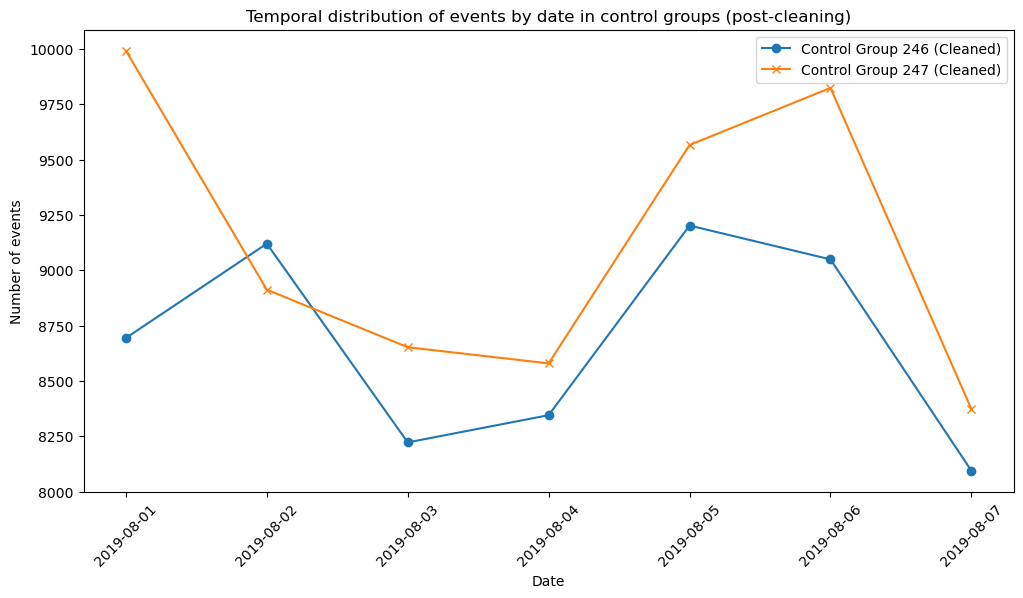

In [45]:
# Temporal analysis: Event distribution by day for each control group

# Count the number of events per date for each cleaned control group
events_per_date_246_cleaned = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 246]['date'].value_counts().sort_index()
events_per_date_247_cleaned = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 247]['date'].value_counts().sort_index()

# Plot the event distribution by date for both control groups after cleaning
plt.figure(figsize=(12, 6))
plt.plot(events_per_date_246_cleaned, label='Control Group 246 (Cleaned)', marker='o')
plt.plot(events_per_date_247_cleaned, label='Control Group 247 (Cleaned)', marker='x')
plt.title('Temporal distribution of events by date in control groups (post-cleaning)')
plt.xlabel('Date')
plt.ylabel('Number of events')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Additional Factors to Investigate:

1. **Geographic factors**: Check for regional differences in user behavior across groups.  
2. **Temporal factors**: Analyze whether certain days or time slots show different behavior between groups.  
3. **Device factors**: Evaluate whether the types of devices used differ significantly between groups.

---

## Temporal Analysis of Event Distribution by Date (After Removing Anomalous Users)

The chart shows the event distribution in both control groups (246 and 247) after cleaning anomalous users.

### Observations:

- The overall trend of events over time remains very similar between both groups.  
- Although there are slight variations on some days, there does not appear to be any significant temporal bias that would explain the observed differences.

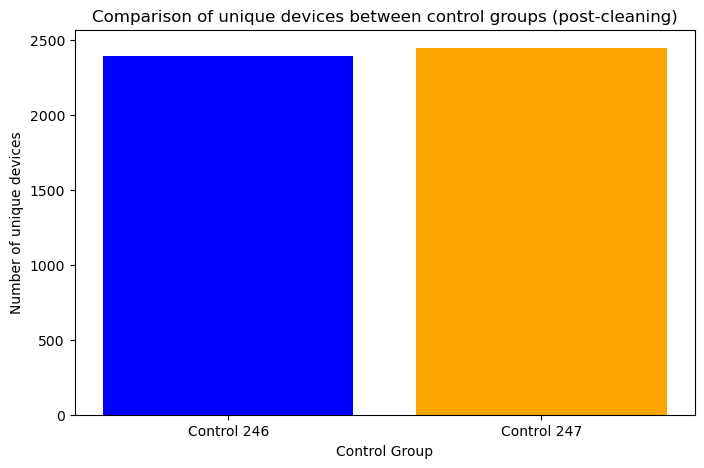

Unique devices - Control 246: 2396, Control 247: 2446


In [46]:
# Device analysis: Check for differences in devices used between control groups

# Count the number of unique users (devices) per control group after cleaning
devices_per_group_246 = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 246]['user_id'].nunique()
devices_per_group_247 = cleaned_data_v2[cleaned_data_v2['experiment_id'] == 247]['user_id'].nunique()

# Create a bar chart to compare the number of unique devices in each control group
plt.figure(figsize=(8, 5))
plt.bar(['Control 246', 'Control 247'], [devices_per_group_246, devices_per_group_247], color=['blue', 'orange'])
plt.title('Comparison of unique devices between control groups (post-cleaning)')
plt.xlabel('Control Group')
plt.ylabel('Number of unique devices')
plt.show()

print(f"Unique devices - Control 246: {devices_per_group_246}, Control 247: {devices_per_group_247}")

## Device Analysis Between Control Groups (After Removing Anomalous Users)

- **Control Group 246**: 2,396 unique devices  
- **Control Group 247**: 2,446 unique devices  

### Observations:

- The number of unique devices is very similar between both groups, with a minimal difference of 50 devices.  
- This small variation does not appear to be sufficient to explain the previously observed significant differences.

## Next Step:

Obtain additional data to perform a **geographic analysis** and verify whether there are differences in the geographic distribution of users between the control groups.